<a href="https://colab.research.google.com/github/ashhwiithac22/Deep-Learning-Experiments/blob/main/DL_Ex9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Neural Network Architecture ===
Input Layer:  2 features
Hidden Layer: 4 neurons, Activation: ReLU
Output Layer: 1 neuron, Activation: Sigmoid
Epoch 1/500 - Loss: 0.693088
Epoch 50/500 - Loss: 0.693079
Epoch 100/500 - Loss: 0.693069
Epoch 150/500 - Loss: 0.693061
Epoch 200/500 - Loss: 0.693052
Epoch 250/500 - Loss: 0.693043
Epoch 300/500 - Loss: 0.693034
Epoch 350/500 - Loss: 0.693026
Epoch 400/500 - Loss: 0.693017
Epoch 450/500 - Loss: 0.693009
Epoch 500/500 - Loss: 0.693001
=== Neural Network Architecture ===
Input Layer:  2 features
Hidden Layer: 4 neurons, Activation: ReLU
Output Layer: 1 neuron, Activation: Sigmoid
Epoch 1/500 - Loss: 0.693149
Epoch 50/500 - Loss: 0.693070
Epoch 100/500 - Loss: 0.693000
Epoch 150/500 - Loss: 0.692938
Epoch 200/500 - Loss: 0.692877
Epoch 250/500 - Loss: 0.692816
Epoch 300/500 - Loss: 0.692753
Epoch 350/500 - Loss: 0.692684
Epoch 400/500 - Loss: 0.692605
Epoch 450/500 - Loss: 0.692509
Epoch 500/500 - Loss: 0.692391
=== Neural Network Architectur

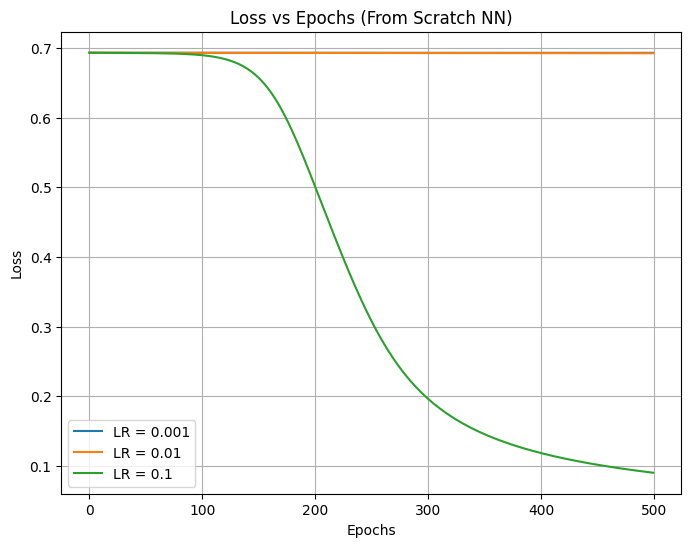

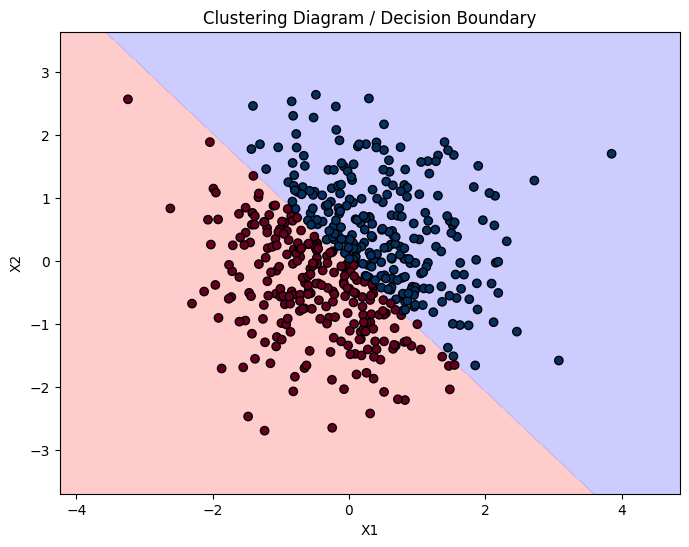

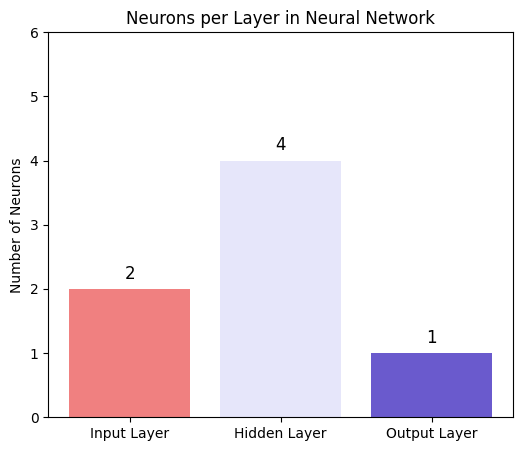

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

m = 500
X = np.random.randn(2, m)
Y = (X[0] + X[1] > 0).astype(int).reshape(1, m)  # Label 1 if x1+x2>0 else 0

def relu(Z):
    A = np.zeros_like(Z)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            A[i, j] = max(0, Z[i, j])
    return A

def relu_derivative(Z):
    dZ = np.zeros_like(Z)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            dZ[i, j] = 1 if Z[i, j] > 0 else 0
    return dZ

def sigmoid(Z):
    A = np.zeros_like(Z)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            A[i, j] = 1 / (1 + np.exp(-Z[i, j]))
    return A

def compute_loss(Y, A):
    m = Y.shape[1]
    loss = 0
    for j in range(m):
        loss += -(Y[0, j] * np.log(A[0, j] + 1e-8) +
                  (1 - Y[0, j]) * np.log(1 - A[0, j] + 1e-8))
    return loss / m


def initialize_parameters():
    W1 = np.random.randn(4, 2) * 0.01
    b1 = np.zeros((4, 1))
    W2 = np.random.randn(1, 4) * 0.01
    b2 = np.zeros((1, 1))
    return W1, b1, W2, b2

def print_network_layers(W1, b1, W2, b2):
    print("=== Neural Network Architecture ===")
    print(f"Input Layer:  {W1.shape[1]} features")
    print(f"Hidden Layer: {W1.shape[0]} neurons, Activation: ReLU")
    print(f"Output Layer: {W2.shape[0]} neuron, Activation: Sigmoid")

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (X, Z1, A1, Z2, A2)
    return A2, cache

def backward_propagation(Y, cache, W2):
    X, Z1, A1, Z2, A2 = cache
    m = X.shape[1]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    return W1, b1, W2, b2

def train_model(X, Y, learning_rate, epochs):
    W1, b1, W2, b2 = initialize_parameters()
    losses = []

    print_network_layers(W1, b1, W2, b2)

    for epoch in range(1, epochs + 1):
        A2, cache = forward_propagation(X, W1, b1, W2, b2)
        loss = compute_loss(Y, A2)
        losses.append(loss)

        dW1, db1, dW2, db2 = backward_propagation(Y, cache, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if epoch % 50 == 0 or epoch == 1:
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.6f}")

    return W1, b1, W2, b2, losses
learning_rates = [0.001, 0.01, 0.1]
epochs = 500

plt.figure(figsize=(8, 6))

for lr in learning_rates:
    W1, b1, W2, b2, losses = train_model(X, Y, lr, epochs)
    plt.plot(losses, label=f"LR = {lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid()
plt.show()

def plot_decision_boundary(W1, b1, W2, b2, X, Y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    grid = np.c_[xx.ravel(), yy.ravel()].T
    A2, _ = forward_propagation(grid, W1, b1, W2, b2)
    Z = A2.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, levels=[0,0.5,1], colors=["#FFAAAA","#AAAAFF"], alpha=0.6)
    plt.scatter(X[0, :], X[1, :], c=Y.flatten(), edgecolor="k", cmap=plt.cm.RdBu)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Clustering Diagram / Decision Boundary")
    plt.show()

plot_decision_boundary(W1, b1, W2, b2, X, Y)
def plot_layer_bargraph(W1, b1, W2, b2):
    layers = ["Input Layer", "Hidden Layer", "Output Layer"]
    neurons = [W1.shape[1], W1.shape[0], W2.shape[0]]  # Input, Hidden, Output

    plt.figure(figsize=(6, 5))
    bars = plt.bar(layers, neurons, color=["lightcoral", "lavender", "slateblue"])

    for bar, neuron in zip(bars, neurons):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, str(neuron),
                 ha='center', va='bottom', fontsize=12)

    plt.title("Neurons per Layer in Neural Network")
    plt.ylabel("Number of Neurons")
    plt.ylim(0, max(neurons) + 2)
    plt.show()

plot_layer_bargraph(W1, b1, W2, b2)